In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_movies = pd.read_csv(r'..\data\movies.csv')
df_ratings = pd.read_csv(r'..\data\ratings.csv')
df_tags = pd.read_csv(r'..\data\tags.csv')
df_links = pd.read_csv(r'..\data\links.csv')

first look at movies

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
df_movies.shape

(9742, 3)

In [6]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


first look at ratings

In [8]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df_ratings.shape

(100836, 4)

In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

first look at tags

In [13]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
df_tags.shape

(3683, 4)

In [15]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [16]:
df_tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [17]:
df_tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

first look at links

In [18]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
df_links.shape

(9742, 3)

In [20]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [21]:
df_links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [22]:
df_links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

1. EDA df_movies

In [23]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
def extract_year(title):
    if not isinstance(title, str):
        return None

    matches = re.findall(r'\((.*?)\)', title)
        
    if not matches:
        return None

    last_skobka = matches[-1]

    year_ = re.search(r'(\d{4})', last_skobka)

    if year_:
        year = int(year_.group(1))
        return year
    
    return None

df_movies['year'] = df_movies['title'].apply(extract_year)
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [25]:
df_movies[df_movies['year'].isna()] #12 пропусков немного в целом

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


In [26]:
def era(year):
    if pd.isna(year):
        return 'Unknown'
    elif year < 1980:
        return 'Old'
    elif year < 1990:
        return "1980's"
    elif year < 2000:
        return "1990's"
    elif year < 2000:
        return "1990's"
    elif year < 2010:
        return "2000's"
    else:
        return "2020's"
df_movies['era'] = df_movies['year'].apply(era)
df_movies.head()

,movieId,title,genres,year,era
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1990's
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1990's
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,1990's
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,1990's
4,5,Father of the Bride Part II (1995),Comedy,1995.0,1990's


In [27]:
df_movies['era'].value_counts()

era
2000's     2850
1990's     2212
2020's     1931
Old        1560
1980's     1177
Unknown      12
Name: count, dtype: int64

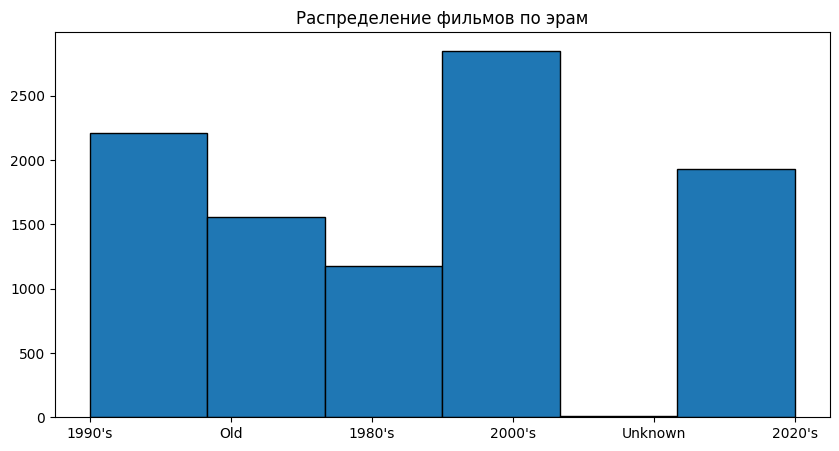

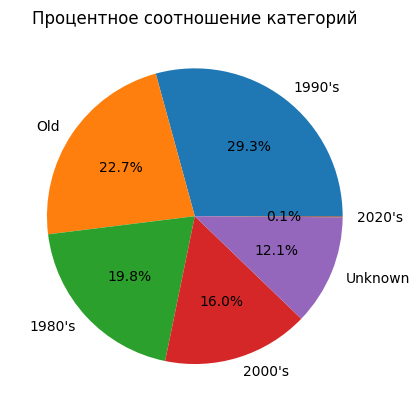

In [28]:
plt.subplots(figsize=(10,5))
plt.title('Распределение фильмов по эрам')
plt.hist(df_movies['era'], bins=len(df_movies['era'].unique()), edgecolor='black')
plt.savefig('eda_v1_figures/films_distribution_hist')
plt.show()
plt.title('Процентное соотношение категорий')
plt.pie(df_movies['era'].value_counts(), labels=df_movies['era'].unique(), autopct='%1.1f%%')
plt.savefig('eda_v1_figures/perc_of_eras_pie')
plt.show()

In [29]:
df_movies[df_movies['genres'] == '(no genres listed)'].shape #всего в 34 фильмах не указан жанр

(34, 5)

In [30]:
groped_by_era = df_movies.groupby(by=df_movies['era']).groups #разделим наши фильмы по эрам. понадобится потом
genres_dummies = df_movies["genres"].str.get_dummies(sep="|") #построим для каждого фильма вектор принадлежности к жанру, понадобится потом для построение recsys 
genres_dummies 

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2. EDA ratings

In [31]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [32]:
df_ratings['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

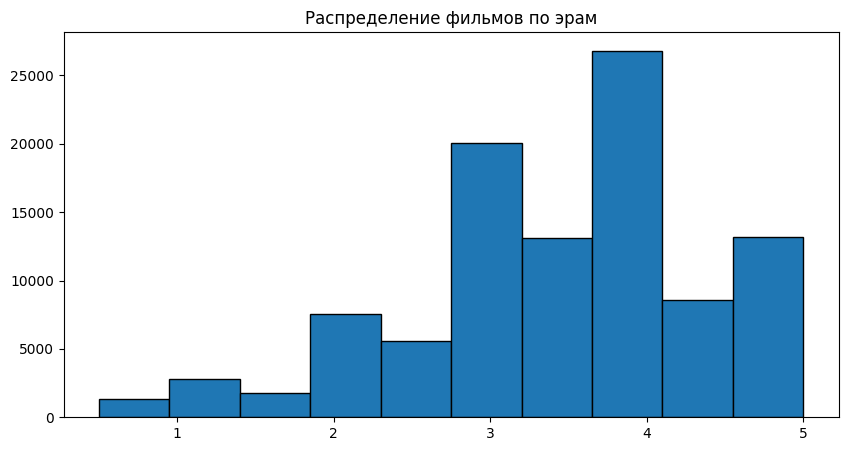

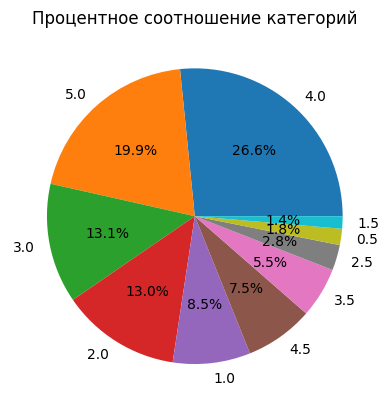

In [33]:
plt.subplots(figsize=(10,5))
plt.title('Распределение фильмов по эрам')
plt.hist(df_ratings['rating'], bins=len(df_ratings['rating'].unique()), edgecolor='black')
plt.savefig('eda_v1_figures/rating_distribution_hist')
plt.show()
plt.title('Процентное соотношение категорий')
plt.pie(df_ratings['rating'].value_counts(), labels=df_ratings['rating'].unique(), autopct='%1.1f%%')
plt.savefig('eda_v1_figures/perc_of_ratings_pie')
plt.show()

In [34]:
df_ratings['readable_time'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings['month'] = df_ratings['readable_time'].dt.month
df_ratings['year'] = df_ratings['readable_time'].dt.year
df_ratings['weekday'] = df_ratings['readable_time'].dt.weekday
df_ratings['is_weekend'] = df_ratings['readable_time'].dt.weekday >= 5
df_ratings.head()

,userId,movieId,rating,timestamp,readable_time,month,year,weekday,is_weekend
0,1,1,4.0,964982703,2000-07-30 18:45:03,7,2000,6,True
1,1,3,4.0,964981247,2000-07-30 18:20:47,7,2000,6,True
2,1,6,4.0,964982224,2000-07-30 18:37:04,7,2000,6,True
3,1,47,5.0,964983815,2000-07-30 19:03:35,7,2000,6,True
4,1,50,5.0,964982931,2000-07-30 18:48:51,7,2000,6,True


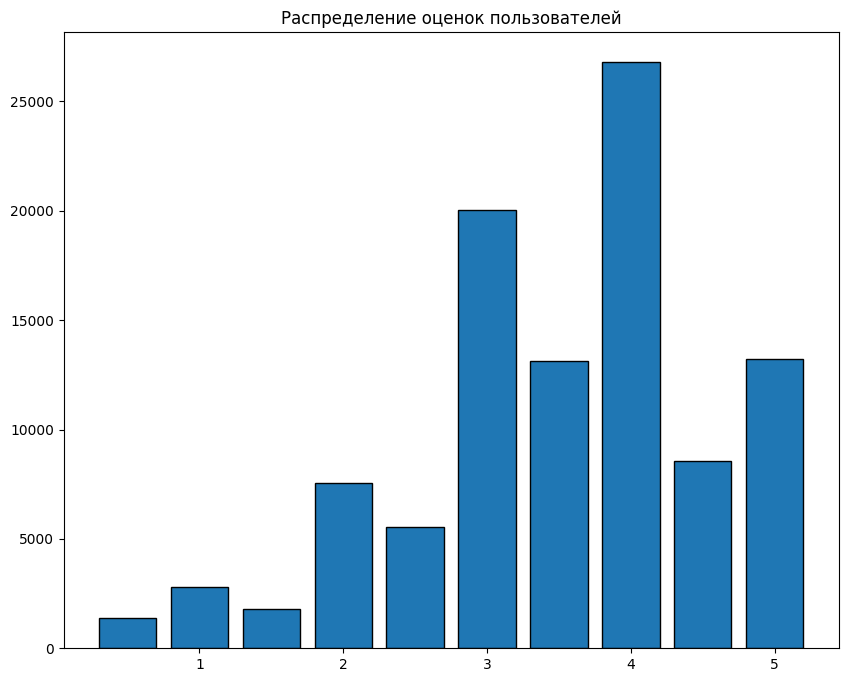

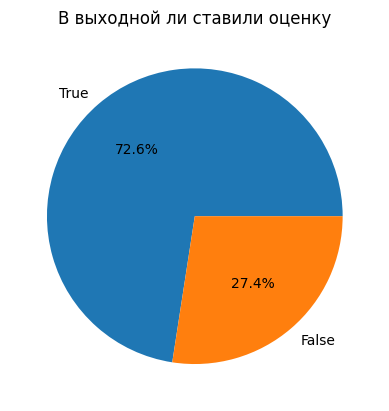

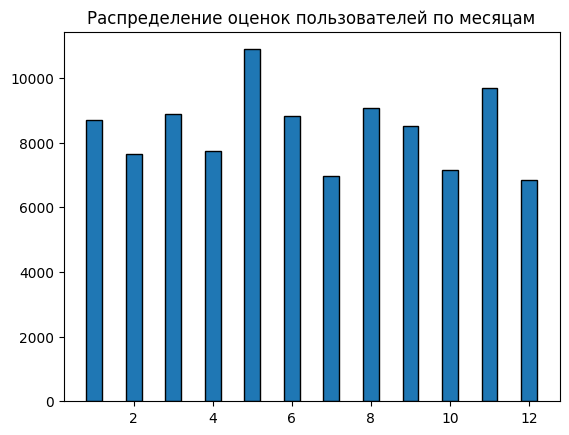

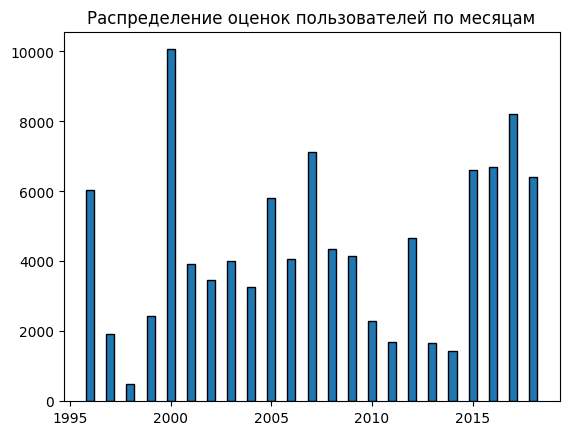

In [43]:
plt.subplots(figsize=(10,8))
rating_counts = df_ratings['rating'].value_counts().sort_index()
month_counts = df_ratings['month'].value_counts().sort_index()
year_counts = df_ratings['year'].value_counts().sort_index()
plt.title('Распределение оценок пользователей')
plt.bar(rating_counts.index, rating_counts.values, edgecolor='black', width=0.4)
plt.savefig('eda_v1_figures/rating_dist_1')
plt.show()
plt.title('В выходной ли ставили оценку')
plt.pie(df_ratings['is_weekend'].value_counts(), labels = df_ratings['is_weekend'].unique(), autopct='%1.1f%%')
plt.savefig('eda_v1_figures/is_weekend_pie')
plt.show()
plt.title('Распределение оценок пользователей по месяцам')
plt.bar(month_counts.index, month_counts.values, edgecolor='black', width=0.4)
plt.savefig('eda_v1_figures/rating_month_bar')
plt.show()
plt.title('Распределение оценок пользователей по месяцам')
plt.bar(year_counts.index, year_counts.values, edgecolor='black', width=0.4)
plt.savefig('eda_v1_figures/rating_year_bar')
plt.show()